In [1]:
!pip install -q kaggle

In [2]:
#Upload kaggle.json file here
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityavardhankammela","key":"946327bb9dca0fec0ccd83e4e6c1330a"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d narayan63/netflix-popular-movies-dataset

  0% 0.00/1.17M [00:00<?, ?B/s]
100% 1.17M/1.17M [00:00<00:00, 33.7MB/s]


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots  import make_subplots
import numpy as np

In [12]:
!unzip netflix-popular-movies-dataset.zip

Archive:  netflix-popular-movies-dataset.zip
  inflating: n_movies.csv            


In [13]:
series =pd.read_csv('/content/n_movies.csv')

In [14]:
series.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [15]:
series.shape

(9957, 9)

In [16]:
series.describe() #summary statistics

,rating
count,8784.000000
mean,6.764515
std,1.214840
min,1.700000
25%,6.100000
50%,6.900000
75%,7.600000
max,9.900000


In [17]:
series.sort_values("rating",ascending=False)

,title,year,certificate,duration,genre,rating,description,stars,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
...,...,...,...,...,...,...,...,...,...
9752,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee and the Squirrels bake a pie and learn ...,['Adam Longworth'],NaN
9802,Hey Duggee,(2014– ),TV-Y,8 min,"Animation, Comedy, Family",NaN,Duggee arranges for the Squirrels to write to ...,"['Adam Longworth, ', 'Lily-Summer Williams']",NaN
9813,Oni: Thunder God's Tale,(2022– ),TV-Y7,NaN,"Animation, Action, Adventure",NaN,Add a Plot,"[""Daisuke 'Dice' Tsutsumi"", '| ', ' Stars:'...",NaN
9842,Hollywood Insider,(2018– ),NaN,NaN,Talk-Show,NaN,Behind the scenes of The Irishman.,"['Bobby Cannavale, ', 'Robert De Niro, ', 'Al ...",NaN


In [18]:
#taking the top 20 highest reviews
top_20 = series.sort_values("rating",ascending=False).head(20)
top_20

,title,year,certificate,duration,genre,rating,description,stars,votes
9444,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
9578,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
8161,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
17,1899,(2022– ),NaN,60 min,"Drama, History, Horror",9.6,Multinational immigrants traveling from the ol...,"['Ben Ashenden, ', 'Aneurin Barnard, ', 'Emily...",853
8259,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
8557,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442"
8907,Avatar: The Last Airbender,(2005–2008),TV-Y7,24 min,"Animation, Action, Adventure",9.6,As the Fire Nation continues its assault on th...,"['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...","3,953"
8044,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,As Zuko tries to make it by in exile without h...,"['Lauren MacMullan', '| ', ' Stars:', 'Dant...","5,383"
9445,BoJack Horseman,(2014–2020),TV-MA,27 min,"Animation, Comedy, Drama",9.5,A celebration brings people together.,"['Aaron Long', '| ', ' Stars:', 'Will Arnet...","6,230"
9586,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.5,Both Aang and Zuko must learn the history of h...,"['Ethan Spaulding', '| ', ' Stars:', 'Zach ...","4,740"


In [19]:
top_20["title"].value_counts()

Avatar: The Last Airbender    4
JoJo's Bizarre Adventure      3
Dark                          3
BoJack Horseman               2
Stranger Things               2
Breaking Bad                  2
1899                          1
Dexter                        1
Anne with an E                1
Cobra Kai                     1
Name: title, dtype: int64

Highest rated series are Avatar: The Last Airbender and JoJo's Bizarre Adventure

In [20]:
top_20["genre"].value_counts()

Animation, Action, Adventure    7
Crime, Drama, Mystery           4
Animation, Comedy, Drama        2
Drama, Fantasy, Horror          2
Crime, Drama, Thriller          2
Drama, History, Horror          1
Drama, Family                   1
Action, Comedy, Drama           1
Name: genre, dtype: int64

Highest rated genre are Animation, Action and Adventure

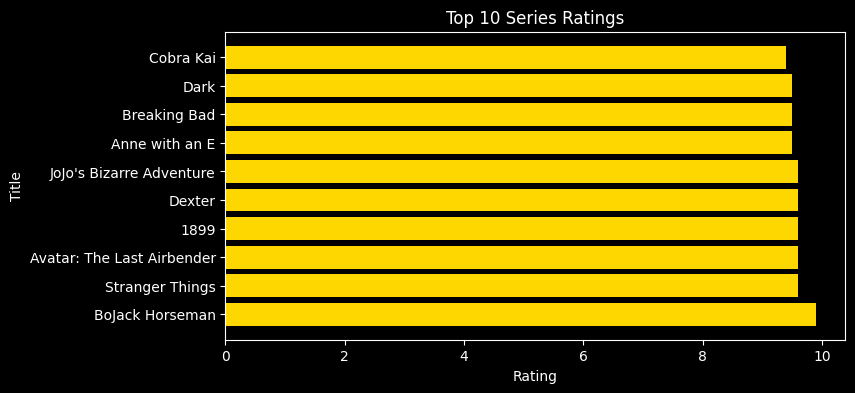

In [21]:
plt.style.use("dark_background")  # Set the style to use a black background
plt.figure(figsize=(8, 4))

# Custom color for the bars
bar_color = "#FFD700"  # Gold color code

# Plot the horizontal bar chart
plt.barh(top_20["title"], top_20["rating"], color=bar_color)

# Add labels and title
plt.xlabel("Rating")
plt.ylabel("Title")
plt.title("Top 10 Series Ratings")

# Display the plot
plt.show()

<Axes: >

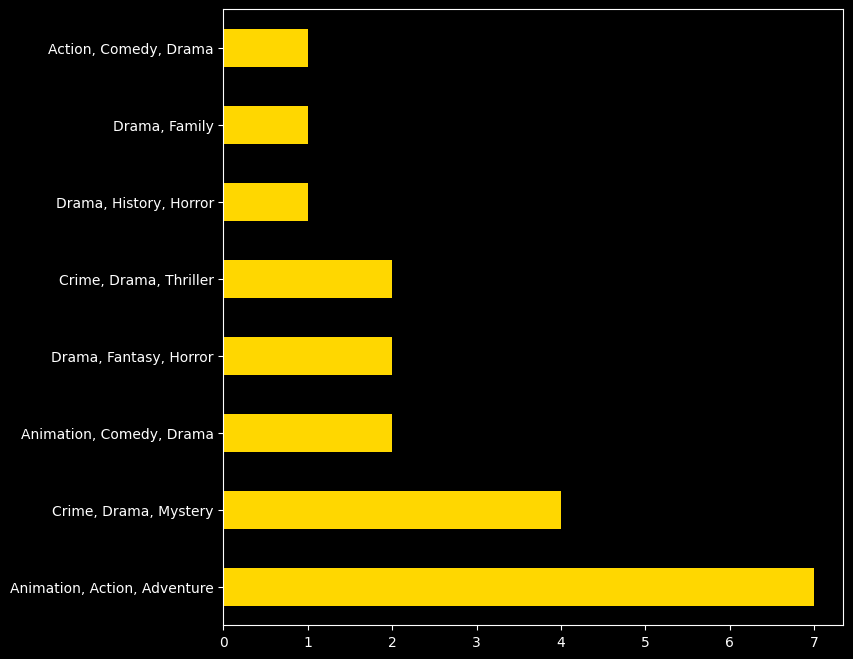

In [22]:
top_20["genre"].value_counts().plot(kind="barh",color="#FFD700",figsize=(8,8))

renaming columns

In [23]:
series=series.rename(columns={'duration':'duration_in_min','stars':"casts_of_series"})

In [24]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            9957 non-null   object 
 1   year             9430 non-null   object 
 2   certificate      6504 non-null   object 
 3   duration_in_min  7921 non-null   object 
 4   genre            9884 non-null   object 
 5   rating           8784 non-null   float64
 6   description      9957 non-null   object 
 7   casts_of_series  9957 non-null   object 
 8   votes            8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Only rating is numerical

In [25]:
series.dropna(inplace=True)

In [26]:
series['duration_in_min']=series['duration_in_min'].apply(lambda x:int(x[:-4]))
series['votes']=series['votes'].apply(lambda x :int(''.join([i for i in x if i!=','])))

In [27]:
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5754 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5754 non-null   object 
 1   year             5754 non-null   object 
 2   certificate      5754 non-null   object 
 3   duration_in_min  5754 non-null   int64  
 4   genre            5754 non-null   object 
 5   rating           5754 non-null   float64
 6   description      5754 non-null   object 
 7   casts_of_series  5754 non-null   object 
 8   votes            5754 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 449.5+ KB


modifying year column

In [28]:
import re
def year_creater(itam):
  pattern='\d{4}'
  dates=re.findall(pattern,itam)
  return dates[0]

In [29]:
series['f_year']=series['year'].apply(year_creater)

In [30]:
def barPlot(data,col_name,top_val=None):
    val=data[col_name].value_counts()[:top_val]
    fig =make_subplots(rows=1 , cols=1,subplot_titles=[col_name])
    fig.add_trace(go.Bar(x=val.index,y=val.values,name=col_name))
    fig.update_layout(title=f"Most freaquents {col_name}",bargap=0.03,font_color="white",height=500)
    fig.update_layout({'paper_bgcolor':'black',"plot_bgcolor":'black'})
    return fig


In [31]:
barPlot(series,'f_year',21)

In [32]:
barPlot(series,'certificate',15)

In [33]:
def histogram(data,col_name,nbinsx=None):
    fig =make_subplots(rows=1 , cols=1,subplot_titles=[col_name])
    fig.add_trace(go.Histogram(x=data[col_name],name=col_name,nbinsx=nbinsx),row=1,col=1)
    fig.update_layout(title=f"Distributions of  col {col_name}",bargap=0.03,font_color="white",height=500)
    fig.update_layout({'paper_bgcolor':'black',"plot_bgcolor":'black'})
    return fig

In [34]:
histogram(series,"duration_in_min",50)

In [35]:
histogram(series,"rating",50)

In [36]:
histogram(series,"votes",10)

In [37]:
series=series[(series['votes'] >200)& (series["rating"]>3) ] # selecting series voted by more than 200 people and rated >3

In [38]:
series.head()

,title,year,certificate,duration_in_min,genre,rating,description,casts_of_series,votes,f_year
0,Cobra Kai,(2018– ),TV-14,30,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031,2018
1,The Crown,(2016– ),TV-MA,58,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885,2016
2,Better Call Saul,(2015–2022),TV-MA,46,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384,2015
3,Devil in Ohio,(2022),TV-MA,356,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773,2022
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413,2022


In [39]:
series.shape

(5118, 10)

In [40]:
series=series[['title','certificate','genre','description','casts_of_series']]

In [41]:
series.head()

,title,certificate,genre,description,casts_of_series
0,Cobra Kai,TV-14,"Action, Comedy, Drama",Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn..."
1,The Crown,TV-MA,"Biography, Drama, History",Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St..."
2,Better Call Saul,TV-MA,"Crime, Drama",The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan..."
3,Devil in Ohio,TV-MA,"Drama, Horror, Mystery",When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo..."
4,Cyberpunk: Edgerunners,TV-MA,"Animation, Action, Adventure",A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ..."


In [42]:
# cols val to list
series['certificate']=series['certificate'].apply(lambda x :[x])
series['genre']=series['genre'].apply(lambda x:[x])
series['description']=series['description'].apply(lambda x:x.split())

In [43]:
series.head()

,title,certificate,genre,description,casts_of_series
0,Cobra Kai,[TV-14],"[Action, Comedy, Drama]","[Decades, after, their, 1984, All, Valley, Kar...","['Ralph Macchio, ', 'William Zabka, ', 'Courtn..."
1,The Crown,[TV-MA],"[Biography, Drama, History]","[Follows, the, political, rivalries, and, roma...","['Claire Foy, ', 'Olivia Colman, ', 'Imelda St..."
2,Better Call Saul,[TV-MA],"[Crime, Drama]","[The, trials, and, tribulations, of, criminal,...","['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan..."
3,Devil in Ohio,[TV-MA],"[Drama, Horror, Mystery]","[When, a, psychiatrist, shelters, a, mysteriou...","['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo..."
4,Cyberpunk: Edgerunners,[TV-MA],"[Animation, Action, Adventure]","[A, Street, Kid, trying, to, survive, in, a, t...","['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ..."


In [44]:
def cast(data):
  sdata=data.split(", ', '")
  c_name=[]
  for i in sdata:
    if '[' in i or ']' in i:
        i=i.replace('[','')
        i=i.replace(']','')
        i=i.replace("'",'')
        i=i.replace(' ','')
        c_name.append(i)
    else:
      i=i.replace(' ','')
      c_name.append(i)
  if type(c_name)==list:
    return c_name
  else :
    return list(c_name)

In [45]:
series['casts_of_series']=series['casts_of_series'].apply(cast)

In [46]:
series["keywords"]=series['certificate']+series['genre']+series['description']+series['casts_of_series']

In [47]:
n_series=series[["title",'keywords']]

In [48]:
n_series

,title,keywords
0,Cobra Kai,"[TV-14, Action, Comedy, Drama, Decades, after,..."
1,The Crown,"[TV-MA, Biography, Drama, History, Follows, th..."
2,Better Call Saul,"[TV-MA, Crime, Drama, The, trials, and, tribul..."
3,Devil in Ohio,"[TV-MA, Drama, Horror, Mystery, When, a, psych..."
4,Cyberpunk: Edgerunners,"[TV-MA, Animation, Action, Adventure, A, Stree..."
...,...,...
9952,The Imperfects,"[TV-MA, Action, Adventure, Drama, After, an, e..."
9953,The Walking Dead,"[TV-MA, Drama, Horror, Thriller, Sheriff, Depu..."
9954,The Crown,"[TV-MA, Biography, Drama, History, Follows, th..."
9955,Supernatural,"[TV-14, Drama, Fantasy, Horror, Two, brothers,..."


In [49]:
from string import punctuation
punct_list=list(punctuation)

In [50]:
def pun_remove(data):
  data=' '.join(data)
  for i in punct_list:
    data=data.replace(i,'')
  return data.lower()

In [51]:
n_series['keywords']=n_series['keywords'].apply(pun_remove)

<ipython-input-51-3d4c85ed33a9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [53]:
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()

In [54]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
def lwl(data):
  llw=[]
  for w in data.split():
    rootWord=ps.stem(w)
    llw.append(rootWord)

  return ' '.join(llw)

In [55]:
n_series['keywords']=n_series['keywords'].apply(lwl)

<ipython-input-55-f93534975c7b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
n_series.drop_duplicates("title",inplace=True)
n_series.dropna(inplace=True)

<ipython-input-56-ea99d0f0d966>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-ea99d0f0d966>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
n_series.shape

(4092, 2)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words='english',max_features=6000)

In [59]:
vectors=cv.fit_transform(n_series['keywords']).toarray()

Using cosine similarity as a measure to compare series

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)


In [61]:
def recommendations(movie):
  movie_index=n_series[n_series['title']==movie].index[0]
  series_tuples=sorted(enumerate(similarity[movie_index]),reverse=True,key=lambda x :x[1])[1:11]

  for i in series_tuples:
      series=n_series.iloc[i[0]]
      if len(series)>0:
          print(series[0])

In [62]:
n_series

,title,keywords
0,Cobra Kai,tv14 action comedi drama decad after their 198...
1,The Crown,tvma biographi drama histori follow the polit ...
2,Better Call Saul,tvma crime drama the trial and tribul of crimi...
3,Devil in Ohio,tvma drama horror mysteri when a psychiatrist ...
4,Cyberpunk: Edgerunners,tvma anim action adventur a street kid tri to ...
...,...,...
9317,Ginny & Georgia,tvma comedi drama hunter aloof make ginni inse...
9323,The Irregulars,tv14 crime drama fantasi as jessi nightmar gro...
9402,Fate: The Winx Saga,tvma action adventur drama in hope of master h...
9754,Dash & Lily,tv14 comedi drama romanc when dash find an unm...


In [63]:
print(list(n_series['title']))

['Cobra Kai', 'The Crown', 'Better Call Saul', 'Devil in Ohio', 'Cyberpunk: Edgerunners', 'The Sandman', 'Rick and Morty', 'Breaking Bad', 'The Imperfects', 'Blonde', 'Stranger Things', 'End of the Road', 'The Walking Dead', 'Glass Onion: A Knives Out Mystery', 'Do Revenge', 'I Came By', 'No Limit', 'Peaky Blinders', 'The Lord of the Rings: The Fellowship of the Ring', "Grey's Anatomy", 'Supernatural', 'American Horror Story', 'The Accidental Narco', 'NCIS', 'Friends', 'Shameless', 'Modern Family', 'Ozark', 'Echoes', 'The Gray Man', 'Me Time', 'Suits', 'Vikings', 'The Witcher', 'The Blacklist', 'Seinfeld', 'Lucifer', 'The Umbrella Academy', 'The Last Kingdom', 'Partner Track', 'Love in the Villa', 'Black Mirror', 'Brooklyn Nine-Nine', 'Squid Game', 'Gilmore Girls', 'Outlander', 'Ófærð', 'Never Have I Ever', 'Attack on Titan', 'Manifest', 'Locke & Key', 'Day Shift', 'Dark', 'Sex Education', 'The Lord of the Rings: The Return of the King', 'The Vampire Diaries', 'Virgin River', 'Family G

In [64]:
recommendations('Friends')

A Series of Unfortunate Events
Doc Martin
Almost Love
Tyler Perry's A Madea Homecoming
Flavors of Youth
No Good Nick
Mixtape
Namaste Wahala
Best. Worst. Weekend. Ever.
Fated to Love You


In [65]:
recommendations('Breaking Bad')

Extracurricular
Black Space
Ozark
You Get Me
Mrs. Serial Killer
The Break
Man Down
Collision
How to Sell Drugs Online (Fast)
Fatma


In [66]:
recommendations('The Walking Dead')

Ánimas
Get In
Slasher
Dancing on Glass
Bitten
Two
Luna Nera
Sense8
V-Wars
Anatomy of a Scandal


In [67]:
recommendations('Better Call Saul')

El Camino: A Breaking Bad Movie
American Crime Story
The Staircase
Irmandade
Extracurricular
Asakusa Kid
Mrs. Serial Killer
Daredevil
For Life
Furioza


In [68]:
recommendations('Supernatural')

Rurouni Kenshin Part I: Origins
Steel Rain
Santo
Kore wa Zombie desu ka?
American Crime Story
Wheelman
The Great Father
Narcos
A Twelve-Year Night
Delete


In [69]:
recommendations('Narcos')

Murder, She Wrote
Death Clique
Guilt
Sherlock
CSI: Crime Scene Investigation
Elementary
White Lines
Saving Zoë
Ófærð
Who Killed Sara?


In [70]:
n_series

,title,keywords
0,Cobra Kai,tv14 action comedi drama decad after their 198...
1,The Crown,tvma biographi drama histori follow the polit ...
2,Better Call Saul,tvma crime drama the trial and tribul of crimi...
3,Devil in Ohio,tvma drama horror mysteri when a psychiatrist ...
4,Cyberpunk: Edgerunners,tvma anim action adventur a street kid tri to ...
...,...,...
9317,Ginny & Georgia,tvma comedi drama hunter aloof make ginni inse...
9323,The Irregulars,tv14 crime drama fantasi as jessi nightmar gro...
9402,Fate: The Winx Saga,tvma action adventur drama in hope of master h...
9754,Dash & Lily,tv14 comedi drama romanc when dash find an unm...


In [71]:
similarity

array([[1.        , 0.06131393, 0.06131393, ..., 0.12598816, 0.19446112,
        0.07412493],
       [0.06131393, 1.        , 0.10526316, ..., 0.10814761, 0.16692447,
        0.19088543],
       [0.06131393, 0.10526316, 1.        , ..., 0.10814761, 0.11128298,
        0.12725695],
       ...,
       [0.12598816, 0.10814761, 0.10814761, ..., 1.        , 0.0571662 ,
        0.19611614],
       [0.19446112, 0.16692447, 0.11128298, ..., 0.0571662 , 1.        ,
        0.06726728],
       [0.07412493, 0.19088543, 0.12725695, ..., 0.19611614, 0.06726728,
        1.        ]])

In [72]:
import pickle

In [73]:
pickle.dump(n_series,open("series_rec.pkl","wb"))
pickle.dump(similarity,open("similarity_movies.pkl","wb"))